## Prepare training data

In [1]:
import pandas as pd
from pathlib import Path


In [2]:
#CWD = Current Working Directory, es necesario que el notenook esté en el mismo path que la carpeta UrbanSound8K
download_path = Path.cwd()/'UrbanSound8K' 

# Leer el metadata file
metadata_file = download_path/'metadata'/'UrbanSound8K.csv'
df = pd.read_csv(metadata_file)
df.head()



,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [3]:
# Construir el path concatenando el fold + num + nombre
df['relative_path'] = '/fold' + df['fold'].astype(str) + '/' + df['slice_file_name'].astype(str)

# Tomar las columnas de importancia
df = df[['relative_path', 'classID']]
df.head()

,relative_path,classID
0,/fold5/100032-3-0-0.wav,3
1,/fold5/100263-2-0-117.wav,2
2,/fold5/100263-2-0-121.wav,2
3,/fold5/100263-2-0-126.wav,2
4,/fold5/100263-2-0-137.wav,2


## Audio Pre-processing: Define Transforms

In [5]:
 #Corrí primero la línea de abajo, salió el warning ' No audio backend is available.' 
 # Corrí "str(torchaudio.get_audio_backend())" y decía 'none', por lo que 
 # tuve que instalar el PySoundFile antes de importar torch y todos esos con pip install: 


In [6]:
pip install PySoundFile

Note: you may need to restart the kernel to use updated packages.


In [7]:
import math, random
import torch
import torchaudio
from torchaudio import transforms
from IPython.display import Audio


In [26]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
str(torchaudio.get_audio_backend()) #comprobación de que ya tiene audio backend

'soundfile'

In [9]:
class AudioUtil():
  # ----------------------------
  # Load an audio file. Return the signal as a tensor and the sample rate
  # ----------------------------
  @staticmethod
  def open(audio_file):
    sig, sr = torchaudio.load(audio_file) #torchaudio.load() regresa un tensor y el sample rate
    return (sig, sr)

In [27]:
def plot_waveform(waveform, sample_rate, title="Waveform", xlim=None, ylim=None):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  time_axis = torch.arange(0, num_frames) / sample_rate

  figure, axes = plt.subplots(num_channels, 1)
  if num_channels == 1:
    axes = [axes]
  for c in range(num_channels):
    axes[c].plot(time_axis, waveform[c], linewidth=1)
    axes[c].grid(True)
    if num_channels > 1:
      axes[c].set_ylabel(f'Channel {c+1}')
    if xlim:
      axes[c].set_xlim(xlim)
    if ylim:
      axes[c].set_ylim(ylim)
  figure.suptitle(title)
  plt.show(block=False)

In [29]:
sig1, sr1 = torchaudio.load('C:\\Users\\IngridAlondraOrtizCe\\Documents\\Proyecto C3\\UrbanSound8K\\audio\\fold1\\7061-6-0-0.wav')
sig2, sr2 = torchaudio.load('C:\\Users\\IngridAlondraOrtizCe\\Documents\\Proyecto C3\\UrbanSound8K\\audio\\fold1\\19026-1-0-0.wav')

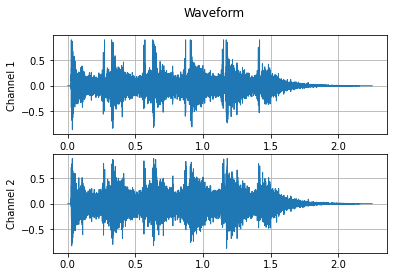

In [30]:
plot_waveform(sig1,sr1)

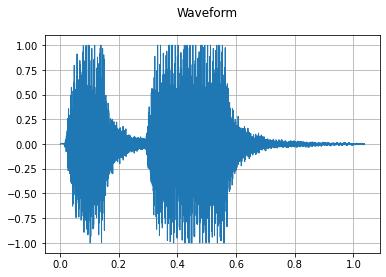

In [31]:
plot_waveform(sig2,sr2)